# Example `Dysmalpy` 2D fitting, using fitting wrapper

**Includes the following components:**

 - Disk + Bulge
 - NFW halo
 - Constant velocity dispersion

#### First import modules ####

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from fitting_wrappers import dysmalpy_fit_single_2D
from fitting_wrappers import utils_io
from dysmalpy import fitting

import os

import numpy as np

##### Setup notebook #####

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import Image

#### Set data, output paths ####

In [3]:
# Data directory
datadir = '/Users/sedona/data/dysmalpy_example_data/'
#'/YOUR/DATA/PATH/'

# Where to save output files
#outdir  = './output_2D/'
outdir = '/Users/sedona/data/dysmalpy_test_examples/JUPYTER_OUTPUT_2D_FITTING_WRAPPER/'
outdir_mpfit = outdir + 'MPFIT/'


param_filename = '/Users/sedona/data/dysmalpy_test_examples/fitting_2D_mpfit.params'

-------------------

In [4]:
with open(param_filename, 'r') as f:
    print(f.read())

# Example parameters file for fitting a single object with 1D data
# Note: DO NOT CHANGE THE NAMES IN THE 1ST COLUMN AND KEEP THE COMMAS!!
# See README for a description of each parameter and its available options.

# ******************************* OBJECT INFO **********************************
galID,    GS4_43501    # Name of your object
z,        1.613        # Redshift


# ****************************** DATA INFO *************************************

#datadir,          None                                   # Optional: Full path to data directory.
datadir,   /Users/sedona/data/dysmalpy_example_data/

fdata_vel,            GS4_43501_Ha_vm.fits        # Full path to vel map. Alternatively, just the filename if 'datadir' is set.
fdata_verr,           GS4_43501_Ha_vm_err.fits    # Full path to vel. err map. Alternatively, just the filename if 'datadir' is set.
fdata_disp,           GS4_43501_Ha_dm.fits        # Full path to disp map. Alternatively, just the filename if 'datadir' is se

##### Add some settings for this notebook example:

In [5]:
plot_type = 'png'

## Run `Dysmalpy` fitting: 2D wrapper, with fit method= MPFIT ##

In [6]:
dysmalpy_fit_single_2D.dysmalpy_fit_single_2D(param_filename=param_filename, 
                                    datadir=datadir, outdir=outdir_mpfit,
                                    plot_type='png')

INFO:DysmalPy:Making path=/Users/sedona/data/dysmalpy_test_examples/JUPYTER_OUTPUT_2D_FITTING_WRAPPER/MPFIT/
INFO:DysmalPy:*************************************
INFO:DysmalPy: Fitting: GS4_43501 using MPFIT
INFO:DysmalPy:    velocity file: /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_vm.fits
INFO:DysmalPy:    dispers. file: /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_dm.fits
INFO:DysmalPy:
mvirial_tied: <function tie_lmvirial_NFW at 0x1a1d819ea0>
INFO:DysmalPy:nSubpixels: 3
INFO:DysmalPy:
MPFIT Fitting:
Start: 2020-10-23 19:13:44.724289

INFO:DysmalPy:Iter 1  CHI-SQUARE = 20224.60535  DOF = 402
   disk+bulge:total_mass = 11  
   disk+bulge:r_eff_disk = 5  
   disk+bulge:bt = 0.3  
   halo:fdm = 0.5  
   dispprof:sigma0 = 39  
   geom:inc = 62  
   geom:pa = 142  
   geom:xshift = 0  
   geom:yshift = 0  
   geom:vel_shift = 0  

INFO:DysmalPy:Iter 2  CHI-SQUARE = 5559.888364  DOF = 402
   disk+bulge:total_mass = 10.88475254  
   disk+bulge:r_eff_disk = 4.950174618  


INFO:DysmalPy:Iter 21  CHI-SQUARE = 988.6262682  DOF = 402
   disk+bulge:total_mass = 10.90817576  
   disk+bulge:r_eff_disk = 4.834557592  
   disk+bulge:bt = 0.3926522828  
   halo:fdm = 0.1705680012  
   dispprof:sigma0 = 31.70572538  
   geom:inc = 70.25525884  
   geom:pa = 146.4128421  
   geom:xshift = 0.3324351793  
   geom:yshift = -0.8728390662  
   geom:vel_shift = 15.69434604  

INFO:DysmalPy:Iter 22  CHI-SQUARE = 988.626255  DOF = 402
   disk+bulge:total_mass = 10.90817208  
   disk+bulge:r_eff_disk = 4.83459993  
   disk+bulge:bt = 0.3926425122  
   halo:fdm = 0.1705644265  
   dispprof:sigma0 = 31.70630213  
   geom:inc = 70.25840057  
   geom:pa = 146.4131879  
   geom:xshift = 0.3324351745  
   geom:yshift = -0.8728390669  
   geom:vel_shift = 15.69488652  

INFO:DysmalPy:Iter 23  CHI-SQUARE = 988.626244  DOF = 402
   disk+bulge:total_mass = 10.90817503  
   disk+bulge:r_eff_disk = 4.834659838  
   disk+bulge:bt = 0.3926493534  
   halo:fdm = 0.1705674681  
   dispprof

------

## Load and examine results: ##

### Read in parameter file ###

In [7]:
params = utils_io.read_fitting_params(fname=param_filename)

# Override data + output paths:
params['datadir'] = datadir
params['outdir'] = outdir_mpfit

# Add the plot type:
params['plot_type'] = plot_type


f_galmodel = params['outdir'] + '{}_galaxy_model.pickle'.format(params['galID'])
f_results =  params['outdir'] + '{}_{}_results.pickle'.format(params['galID'], 
                                                        params['fit_method'])

#### Load the best-fit saved plot:

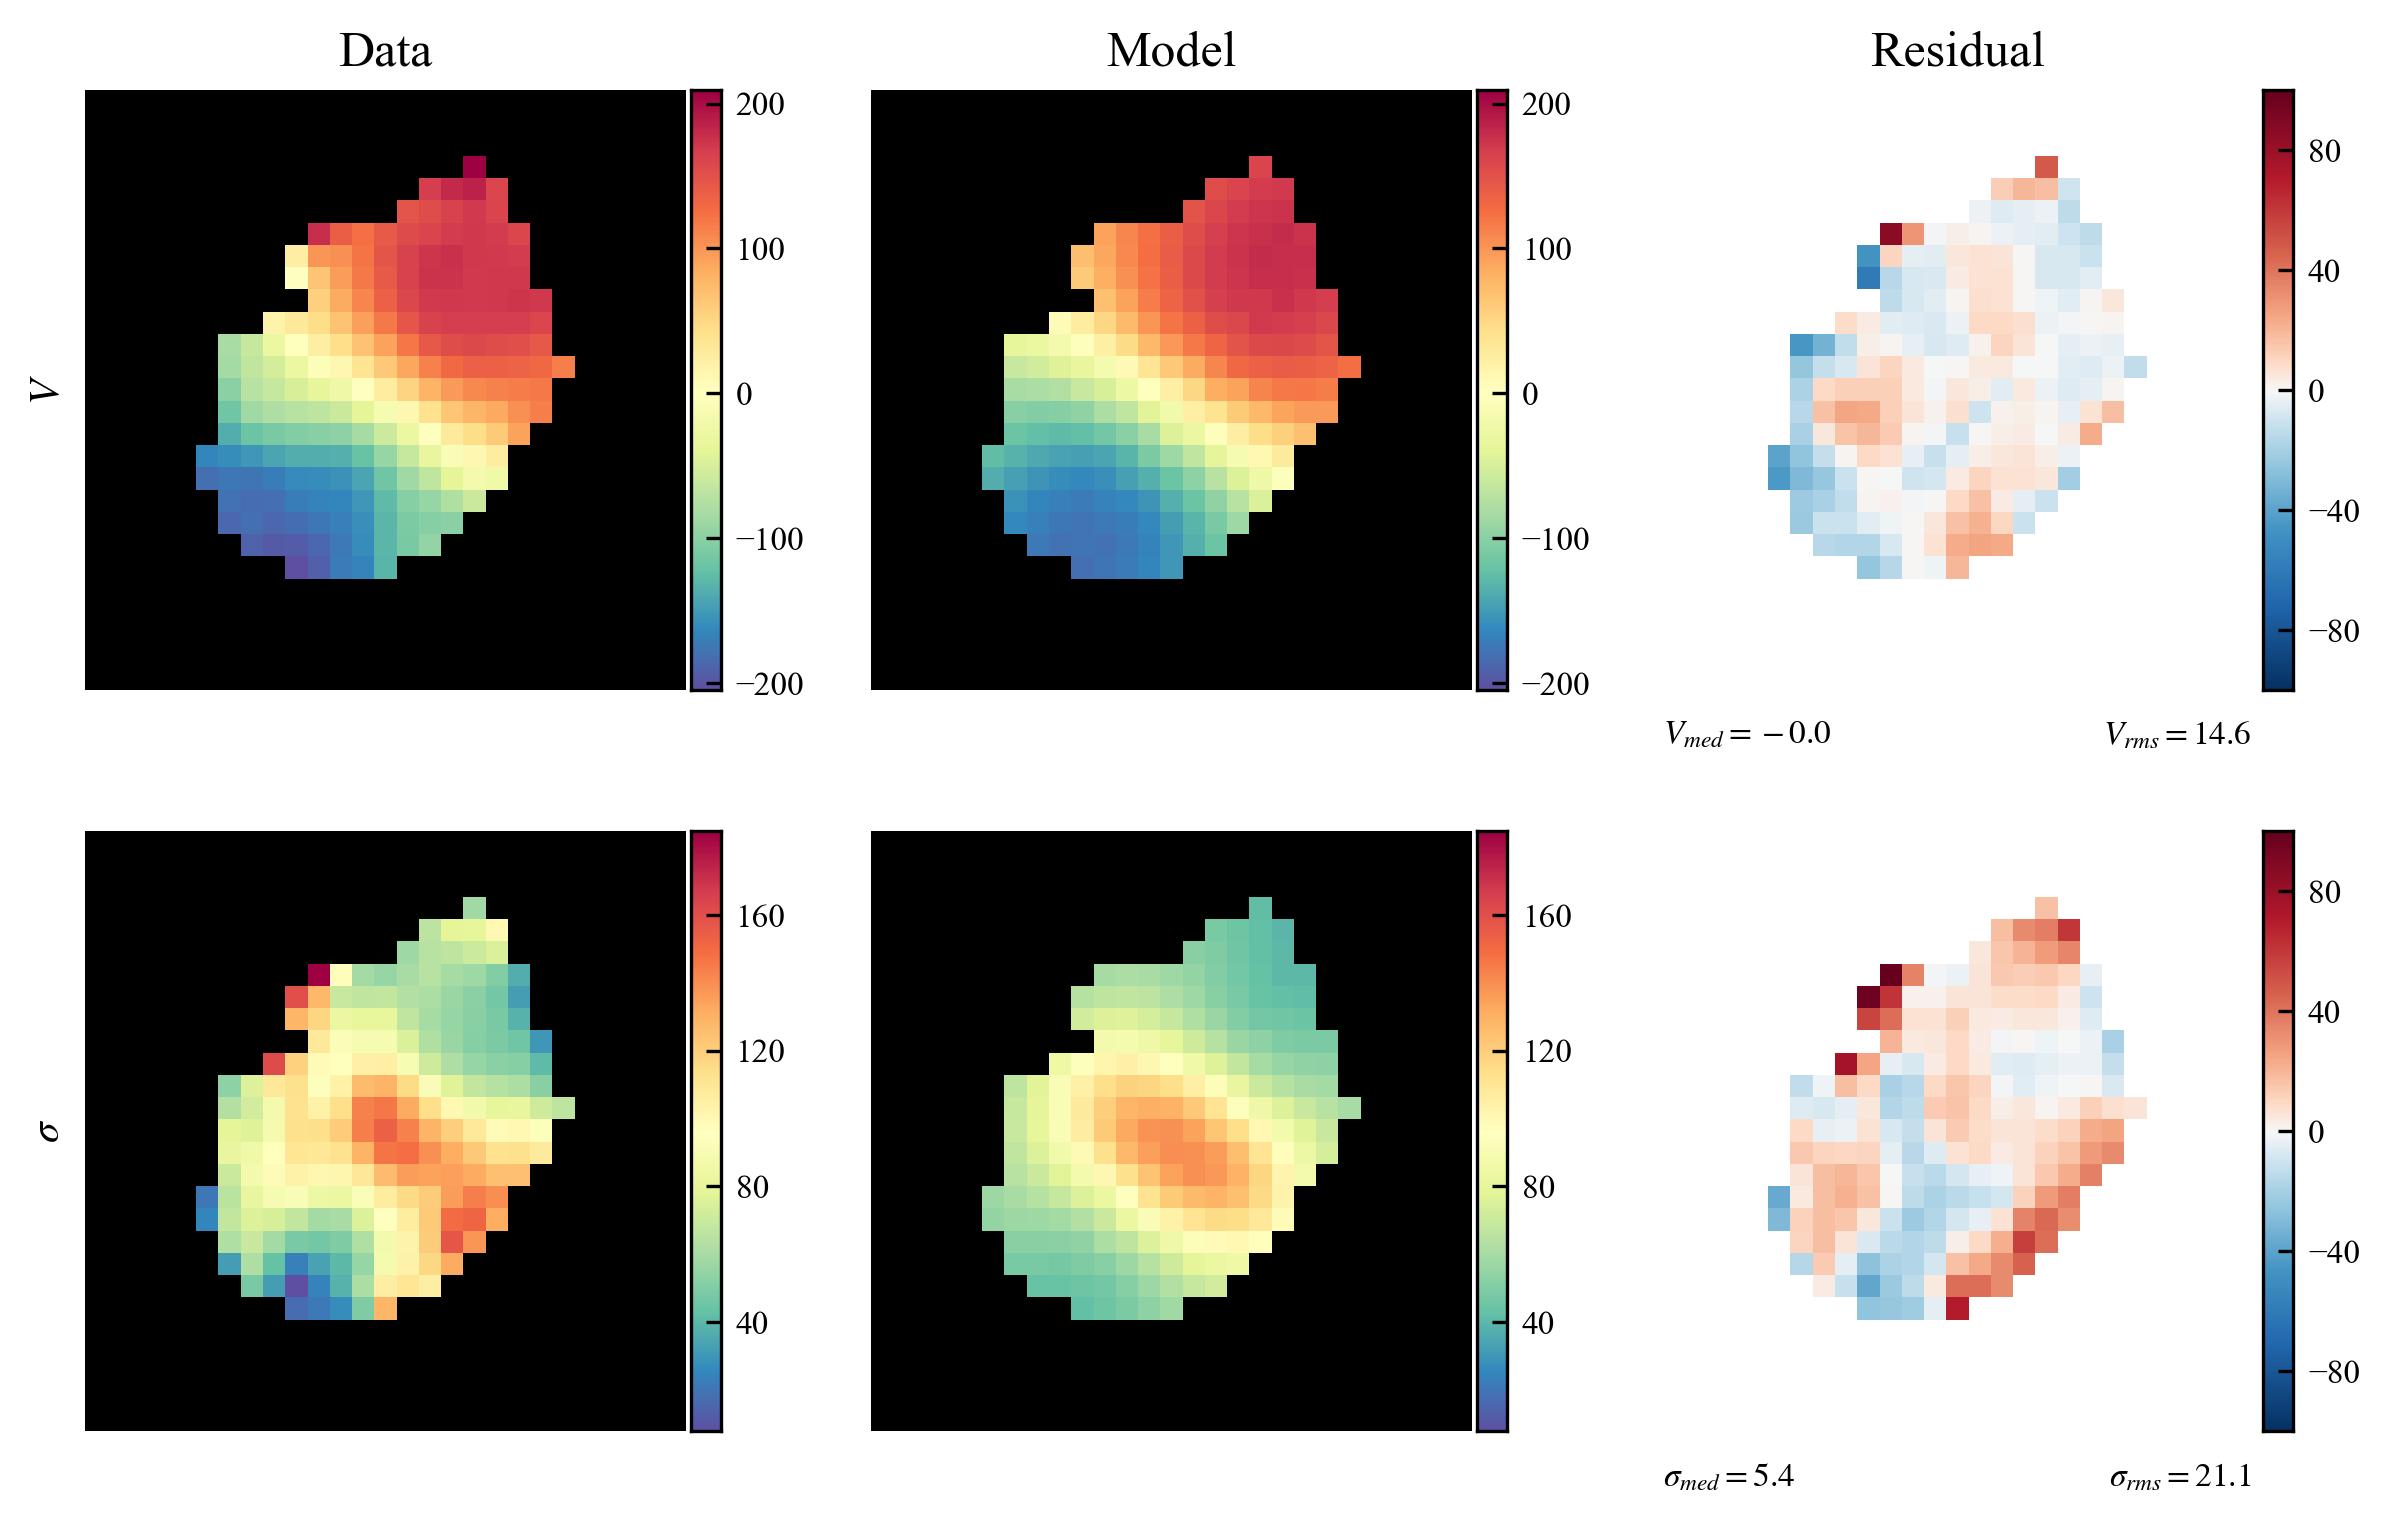

In [8]:
# Look at best-fit:
filepath = outdir_mpfit+"{}_mpfit_best_fit.{}".format(params['galID'], 
                                                        params['plot_type'])
Image(filename=filepath, width=600)

#### Reload the galaxy, results files:

In [9]:
gal, results = fitting.reload_all_fitting(filename_galmodel=f_galmodel, 
                        filename_results=f_results, fit_method=params['fit_method'])

#### Plot the best-fit results:

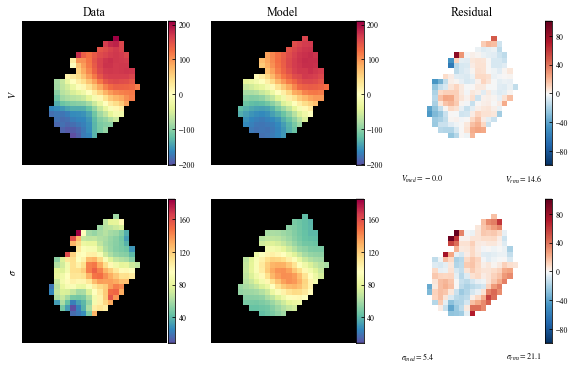

In [10]:
results.plot_results(gal, fitdispersion=params['fitdispersion'], 
                          oversample=params['oversample'], 
                          oversize=params['oversize'])

### Print results report:

In [11]:
# Print report
print(results.results_report(gal=gal))

###############################
 Fitting for GS4_43501

Date: 2020-10-23 19:26:01.584467

Datafiles:
 vel:  /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_vm.fits
 disp: /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_dm.fits

Fitting method: MPFIT

pressure_support_type: 1

###############################
 Fitting results
-----------
 disk+bulge
    total_mass       10.9082  +/-   0.0415
    r_eff_disk        4.8350  +/-   0.3258
    bt                0.3927  +/-   0.0445

    n_disk            1.0000  [FIXED]
    r_eff_bulge       1.0000  [FIXED]
    n_bulge           4.0000  [FIXED]
-----------
 halo
    fdm               0.1706  +/-   0.0427

    mvirial          11.4633  [TIED]
    conc              5.0000  [FIXED]
-----------
 dispprof
    sigma0           31.7048  +/-   1.5410
-----------
 zheightgaus
    sigmaz            0.8213  [TIED]
-----------
 geom
    inc              70.2576  +/-   1.2216
    pa              146.4131  +/-   0.3374
    xshift            0.33

### Or save results report to file:

In [12]:
# Save report to file:
f_report = params['outdir'] + '{}_fit_report.txt'.format(params['galID'])
results.results_report(gal=gal, filename=f_report)

##### Also note the fitting wrappers automatically save info files: ####

In [13]:
f_report_pretty =   params['outdir'] + '{}_{}_best_fit_results.info'.format(params['galID'], 
                                                            params['fit_method'])
f_report_machine =  params['outdir'] + '{}_{}_best_fit_results.dat'.format(params['galID'], 
                                                            params['fit_method'])

In [14]:
with open(f_report_pretty, 'r') as f:
    lines = [line.rstrip() for line in f]
    #lines = f.readlines()
    for line in lines: print(line)

###############################
 Fitting for GS4_43501

Date: 2020-10-23 19:25:58.703068

Datafiles:
 vel:  GS4_43501_Ha_vm.fits
 verr: GS4_43501_Ha_vm_err.fits
 disp: GS4_43501_Ha_dm.fits
 derr: GS4_43501_Ha_dm_err.fits
 mask: GS4_43501_Ha_m.fits
Paramfile: fitting_2D_mpfit.params

Fitting method: MPFIT

moment_calc: True
pressure_support_type: 1

###############################
 Fitting results
-----------
 disk+bulge
    total_mass       10.9082  +/-   0.0415
    r_eff_disk        4.8350  +/-   0.3258
    bt                0.3927  +/-   0.0445

    n_disk            1.0000  [FIXED]
    r_eff_bulge       1.0000  [FIXED]
    n_bulge           4.0000  [FIXED]
-----------
 halo
    fdm               0.1706  +/-   0.0427

    mvirial          11.4633  [TIED]
    conc              5.0000  [FIXED]
-----------
 dispprof
    sigma0           31.7048  +/-   1.5410
-----------
 zheightgaus
    sigmaz            0.8213  [TIED]
-----------
 geom
    inc              70.2576  +/-   1.2216
    pa 

In [15]:
with open(f_report_machine, 'r') as f:
    lines = [line.rstrip() for line in f]
    #lines = f.readlines()
    for line in lines: print(line)

# component    param_name    fixed    best_value   error
disk+bulge     total_mass    False     10.9082      0.0415
disk+bulge     r_eff_disk    False      4.8350      0.3258
disk+bulge     n_disk        True       1.0000    -99.0000
disk+bulge     r_eff_bulge   True       1.0000    -99.0000
disk+bulge     n_bulge       True       4.0000    -99.0000
disk+bulge     bt            False      0.3927      0.0445
halo           mvirial       False     11.4633    -99.0000
halo           conc          True       5.0000    -99.0000
halo           fdm           False      0.1706      0.0427
dispprof       sigma0        False     31.7048      1.5410
zheightgaus    sigmaz        False      0.8213    -99.0000
geom           inc           False     70.2576      1.2216
geom           pa            False    146.4131      0.3374
geom           xshift        False      0.3324      0.0430
geom           yshift        False     -0.8728      0.0344
geom           vel_shift     False     15.6943      0.7047

----------